In [ ]:
pip install tld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 9.1 MB/s eta 0:00:00


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')
from urllib.parse import urlparse
import re
from googlesearch import search
from tld import get_tld
import os.path
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pickle
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [8]:
df=pd.read_csv("/content/malicious_phish.csv")

In [9]:
df.shape

(651191, 2)

In [10]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [11]:
df.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [12]:
df.columns

Index(['url', 'type'], dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [14]:
df.nunique()

url     641119
type         4
dtype: int64

In [15]:
df.type.value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [16]:
df.describe().T

,count,unique,top,freq
url,651191,641119,http://style.org.hc360.com/css/detail/mysite/s...,180
type,651191,4,benign,428103


In [17]:
def Having_ip_address(url):
    match = re.search(
     '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
    '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
         '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        return 1
    else:
        return 0
df["use_of_ip"] = df['url'].apply(lambda i: Having_ip_address(i))

In [18]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0

df["abnormal_url"] = df["url"].apply(lambda i: abnormal_url(i))

In [19]:
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i:google_index(i))

In [20]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))

In [21]:
df.head(10)

,url,type,use_of_ip,abnormal_url,google_index,count.
0,br-icloud.com.br,phishing,0,0,1,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,1,1,2
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,0,1,2
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,0,1,1
8,http://www.pashminaonline.com/pure-pashminas,defacement,0,1,1,2
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,0,1,1


In [22]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'google_index', 'count.'], dtype='object')

In [23]:
def count_www(url):
    url.count('www')
    return url.count('www')
df['count-www'] = df['url'].apply(lambda i:count_www(i))

In [24]:
def count_atrate(url):
    return url.count('@')

df['count@'] = df['url'].apply(lambda i:count_atrate(i))

In [25]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df["count_embed_domain"] = df['url'].apply(lambda i: no_of_embed(i))

In [26]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [27]:
def count_https(url):
    return url.count('https')
df['count-https'] = df['url'].apply(lambda i:count_https(i))

def count_http(url):
    return url.count('http')
df['count-http'] = df['url'].apply(lambda i:count_http(i))

def count_per(url):
    return url.count('%')
df['count%'] = df['url'].apply(lambda i:count_per(i))

def count_ques(url):
    return url.count('?')
df['count?'] = df['url'].apply(lambda i:count_ques(i))

def count_hyphen(url):
    return url.count('-')
df['count-'] = df['url'].apply(lambda i:count_hyphen(i))

In [28]:
def count_equal(url):
    return url.count('=')
df['count='] = df['url'].apply(lambda i:count_equal(i))

def url_length(url):
    return len(str(url))
df['url_length'] = df['url'].apply(lambda i:url_length(i))

def hostname_length(url):
    return len(urlparse(url).netloc)
df['hostname_length'] = df['url'].apply(lambda i:hostname_length(i))

In [29]:
df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domain,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,0,0,0,0,0,0,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,0,0,0,0,0,0,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23


In [30]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0

df['sus_url'] = df['url'].apply(lambda i:suspicious_words(i))

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits+1
    return digits

df['count-digits'] = df['url'].apply(lambda i:digit_count(i))

In [31]:
def letter_count(url):
    letters =0
    for i in url:
        if i.isalpha:
            letters = letters+1
    return letters
df['count-letters'] = df['url'].apply(lambda i:letter_count(i))

In [32]:
def fd_length(url):
    urlpath = urlparse(url).path
    try:
        return lrn(urlpath.split('/')[1])
    except:
        return 0
df['fd_length'] = df['url'].apply(lambda i:fd_length(i))
#length of top level domain
df['tld'] = df['url'].apply(lambda i:get_tld(i,fail_silently=True))

In [33]:
df.head(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domain,...,count?,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters,fd_length,tld
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,0,1,0,16,0,0,0,16,0,None
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,0,35,0,0,1,35,0,None
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,0,31,0,0,1,31,0,None
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,...,1,1,4,88,21,0,7,88,0,be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,...,1,1,3,235,23,0,22,235,0,net
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,1,1,2,0,0,3,0,...,0,16,0,118,11,0,1,118,0,net
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,0,1,2,0,0,6,0,...,0,1,0,45,0,0,4,45,0,None
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,0,1,1,0,0,1,0,...,1,2,1,46,0,0,0,46,0,None
8,http://www.pashminaonline.com/pure-pashminas,defacement,0,1,1,2,1,0,1,0,...,0,1,0,44,22,0,0,44,0,com
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,0,1,1,0,0,2,0,...,0,4,0,45,0,0,5,45,0,None


In [34]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domain', 'short_url',
       'count-https', 'count-http', 'count%', 'count?', 'count-', 'count=',
       'url_length', 'hostname_length', 'sus_url', 'count-digits',
       'count-letters', 'fd_length', 'tld'],
      dtype='object')

In [35]:
df.shape

(651191, 24)

In [36]:
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
df['tld_length'] = df['tld'].apply(lambda i:tld_length(i))

In [37]:
df.head

<bound method NDFrame.head of                                                       url        type  \
0                                        br-icloud.com.br    phishing   
1                     mp3raid.com/music/krizz_kaliko.html      benign   
2                         bopsecrets.org/rexroth/cr/1.htm      benign   
3       http://www.garage-pirenne.be/index.php?option=...  defacement   
4       http://adventure-nicaragua.net/index.php?optio...  defacement   
...                                                   ...         ...   
651186            xbox360.ign.com/objects/850/850402.html    phishing   
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/    phishing   
651188         www.gamespot.com/xbox360/action/deadspace/    phishing   
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)    phishing   
651190          www.angelfire.com/goth/devilmaycrytonite/    phishing   

        use_of_ip  abnormal_url  google_index  count.  count-www  count@  \
0               0

In [38]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domain', 'short_url',
       'count-https', 'count-http', 'count%', 'count?', 'count-', 'count=',
       'url_length', 'hostname_length', 'sus_url', 'count-digits',
       'count-letters', 'fd_length', 'tld', 'tld_length'],
      dtype='object')

In [39]:
df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domain,...,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters,fd_length,tld,tld_length
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,1,0,16,0,0,0,16,0,None,-1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,35,0,0,1,35,0,None,-1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,31,0,0,1,31,0,None,-1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,...,1,4,88,21,0,7,88,0,be,2
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,...,1,3,235,23,0,22,235,0,net,3


In [40]:
df = df.drop("tld",1)

In [41]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domain', 'short_url',
       'count-https', 'count-http', 'count%', 'count?', 'count-', 'count=',
       'url_length', 'hostname_length', 'sus_url', 'count-digits',
       'count-letters', 'fd_length', 'tld_length'],
      dtype='object')

In [42]:
df["type"].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

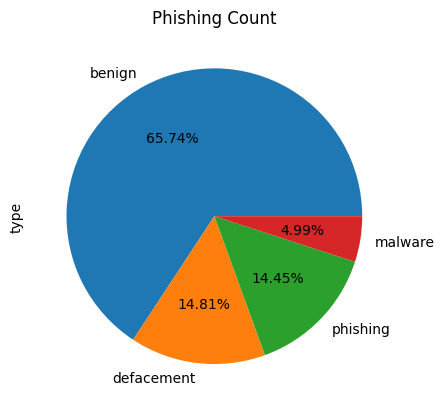

In [43]:
df["type"].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

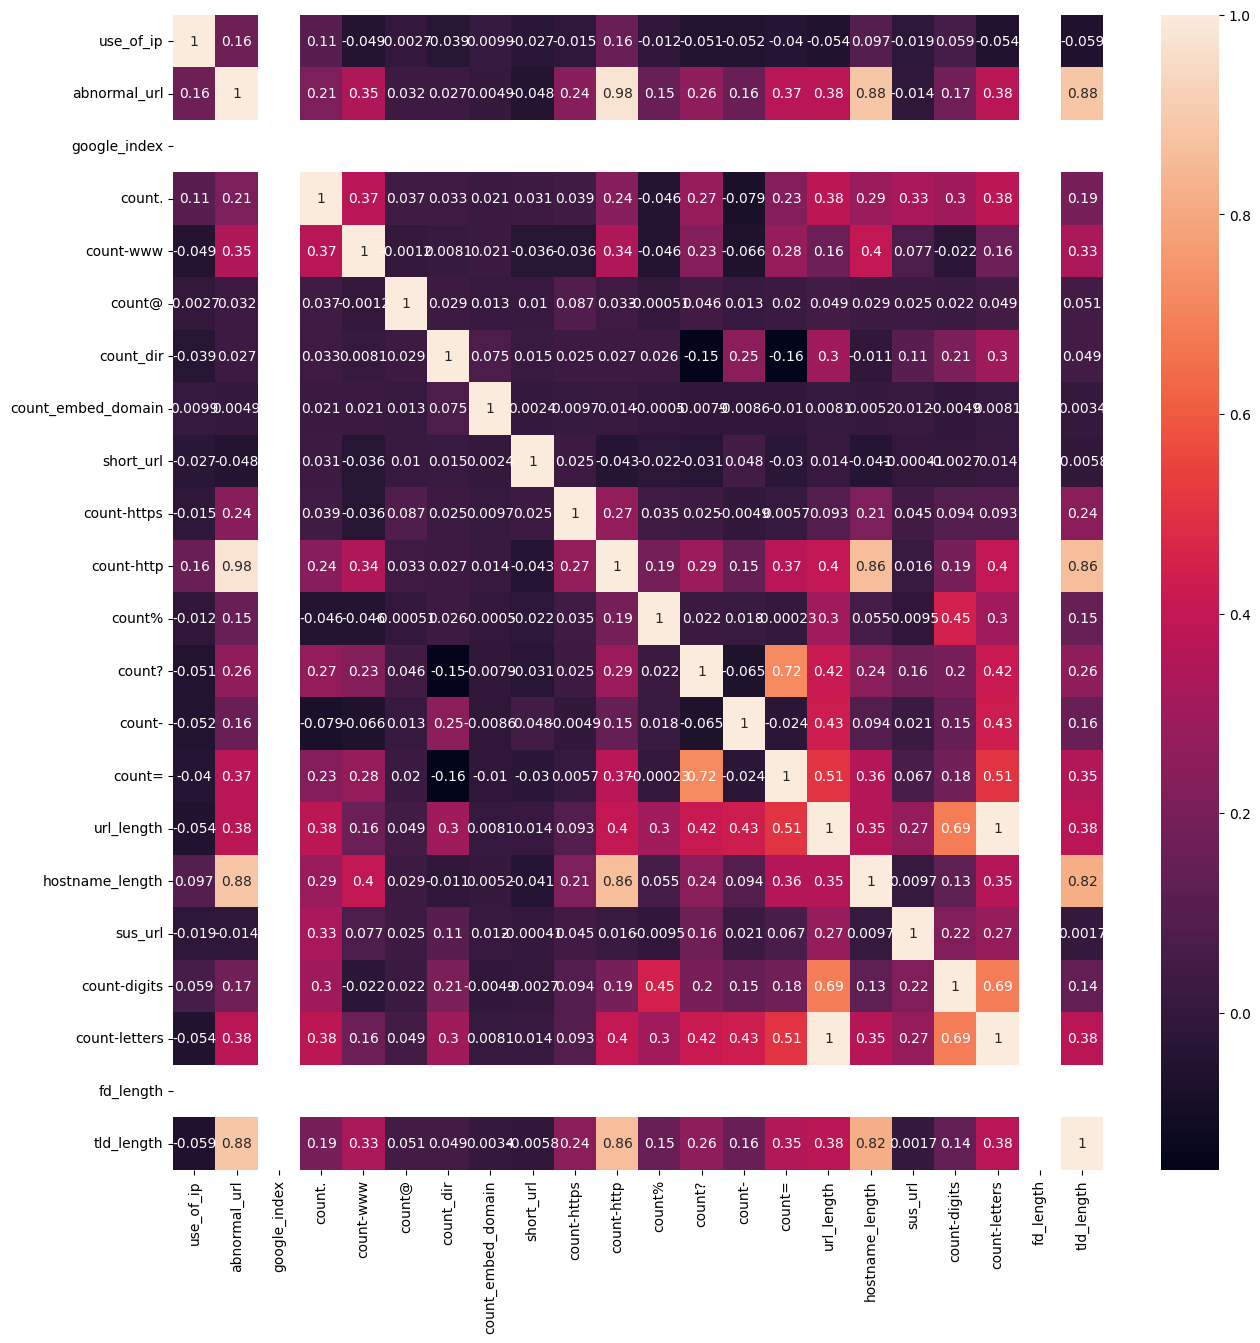

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

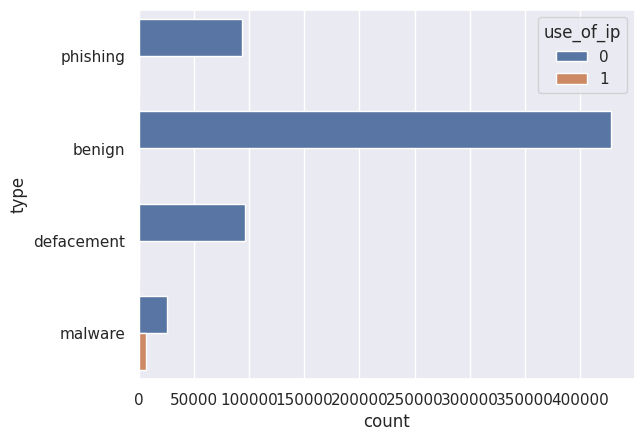

In [45]:
sns.set(style = "darkgrid")
ax = sns.countplot(y="type",data = df,hue = "use_of_ip")

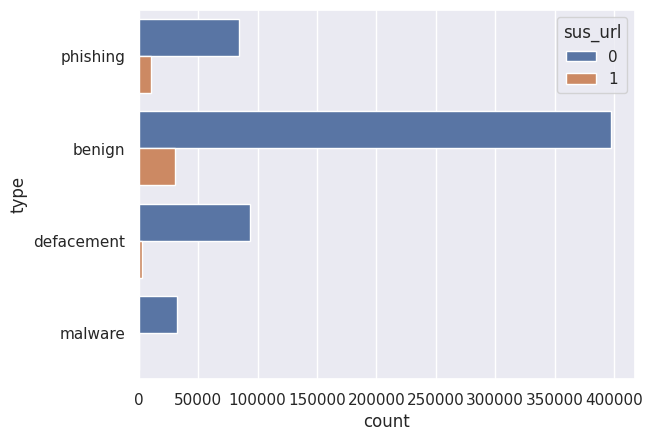

In [46]:
sns.set(style = "darkgrid")
ax = sns.countplot(y="type",data = df,hue = "sus_url")


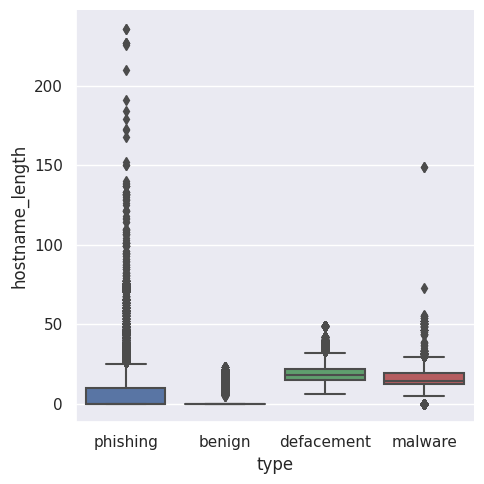

In [47]:
sns.set(style = "darkgrid")
ax = sns.catplot(x="type",y="hostname_length",kind = "box",data=df)

In [49]:
lb_make = LabelEncoder()
df['type_code'] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

0    428103
1     96457
3     94111
2     32520
Name: type_code, dtype: int64

In [50]:
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domain', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

In [52]:
y = df["type_code"]

In [53]:
X.head()

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domain,short_url,count-https,count-http,...,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,0,0,2,0,0,0,0,0,0,0,...,0,1,0,16,0,0,0,-1,0,16
1,0,0,2,0,0,2,0,0,0,0,...,0,0,0,35,0,0,0,-1,1,35
2,0,0,2,0,0,3,0,0,0,0,...,0,0,0,31,0,0,0,-1,1,31
3,0,1,3,1,0,1,0,0,0,1,...,1,1,4,88,21,0,0,2,7,88
4,0,1,2,0,0,1,0,0,0,1,...,1,1,3,235,23,0,0,3,22,235


In [54]:
X.columns

Index(['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domain', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters'],
      dtype='object')

In [57]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size=0.2,shuffle = True,random_state=5)

In [58]:
rf = RandomForestClassifier(n_estimators = 100,max_features = "sqrt")

In [59]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
y_pred_rf = rf.predict(x_test)

In [63]:
print(classification_report(y_test,y_pred_rf,target_names = ['benign','defacement','phishing','malware']))

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.97      0.99      0.98     19292
    phishing       0.98      0.94      0.96      6504
     malware       0.90      0.83      0.87     18822

    accuracy                           0.96    130239
   macro avg       0.96      0.94      0.95    130239
weighted avg       0.96      0.96      0.96    130239



In [66]:
score = accuracy_score(y_test,y_pred_rf)
print(f"accuracy: {score*100}")

accuracy: 96.09947865078816


In [67]:
def main(url):
    status = []
    status.append(Having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))

    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))

    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))

    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)

    status.append(tld_length(tld))

    return status

In [68]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    print(features_test)
    features_test = np.array(features_test).reshape((1, -1))
    print(features_test)
    pred = rf.predict(features_test)
    print(pred)
    if int(pred[0]) == 0:
        res="SAFE"
        return res
    elif int(pred[0]) == 1.0:
        res="DEFACEMENT"
        return res
    elif int(pred[0]) == 2.0:
        res="PHISHING"
        return res

    elif int(pred[0]) == 3.0:
        res="MALWARE"
        return res

In [69]:
urls = 'titaniumcorporate.co.z'
#for url in urls:
print(get_prediction_from_url(urls))

[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0, 0, 0, 22, 0, -1]
[[ 0  0  2  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0 22  0 -1]]
[3]
MALWARE


In [70]:
with open('Phishing_Url_detection.pickle','wb') as f:
    pickle.dump(rf,f)

In [71]:
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [72]:
import pickle
with open('Phishing_Url_detection.pickle','wb') as f:
    pickle.dump(rf,f)

In [73]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))